# Exploratory Data Analysis of the Titanic Dataset

## 1. Introduction & Objective

The objective of this analysis is to perform an Exploratory Data Analysis (EDA) on the Titanic dataset.The goal is to extract meaningful insights by exploring the data statistically and visually. This report will investigate the factors that influenced passenger survival and present key findings through charts and written observations.

---

## 2. Data Loading and Initial Inspection

First, we load the dataset and perform an initial inspection to understand its structure, data types, and identify any immediate issues like missing data.

### 2.1. Loading the Data

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
df = pd.read_csv('train.csv')

# Display the first few rows to see what it looks like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2. Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: Note that the Age, Cabin, and Embarked columns have missing values. Age is a numeric type, while Cabin and Embarked are objects (strings).

### 2.3. Descriptive Statistics

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation: The average passenger age was about 30. The fare prices varied wildly, from 0 to over $512.

## 3. Univariate Analysis
Here we analyze individual variables to understand their distributions

### 3.1 Survival Distribution

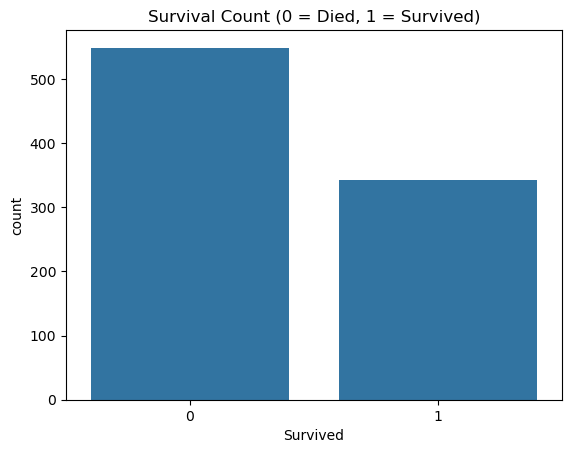

Survived
0    549
1    342
Name: count, dtype: int64


In [6]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.show()

print(df['Survived'].value_counts())

Observation: More passengers died (549) than survived (342) in the dataset.

### 3.2. Passenger Class Distribution

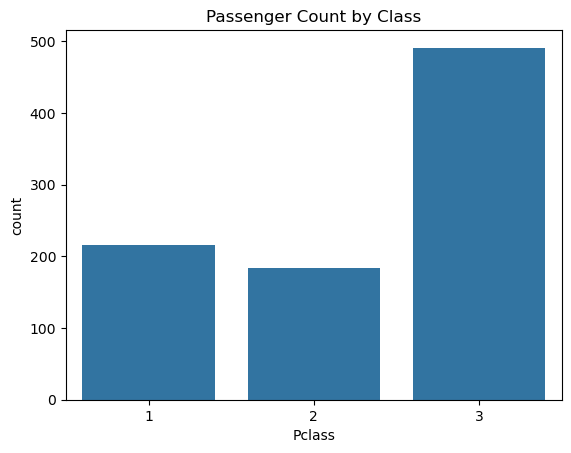

In [18]:
# Plot for Pclass
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.show()

Observation: The majority of passengers were in the 3rd class.

### 3.3. Sex Distribution

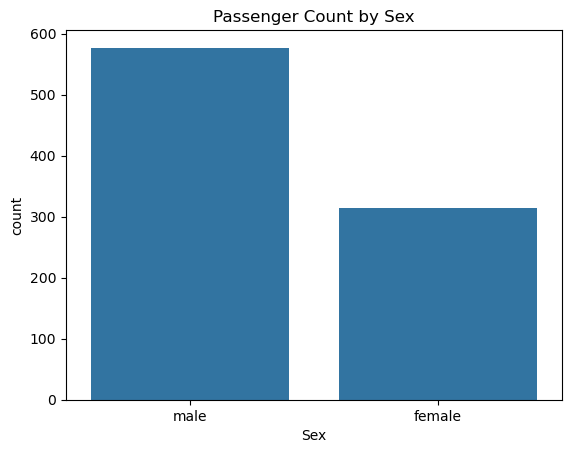

In [8]:
# Plot for Sex
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Sex')
plt.show()

Observation: There were significantly more male passengers than female passengers.

### 3.4. Age Distribution

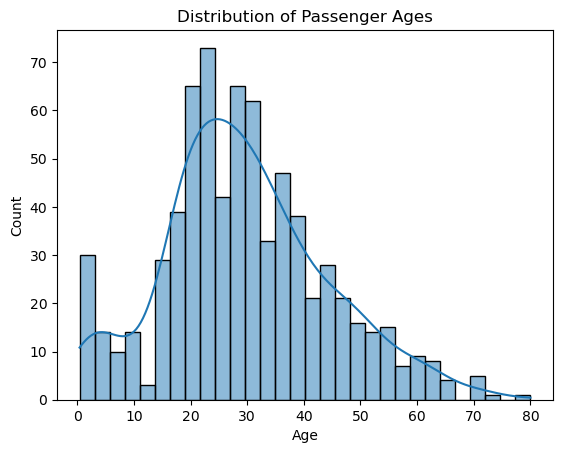

In [9]:
# Histogram for Age
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Passenger Ages')
plt.show()

Observation: The passenger age distribution peaks between 20-30 years old.

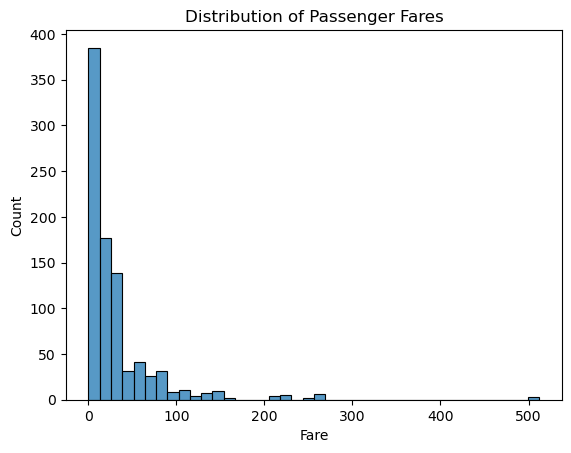

In [10]:
# Histogram for Fare
sns.histplot(df['Fare'], kde=False, bins=40)
plt.title('Distribution of Passenger Fares')
plt.show()

Observation: The fare distribution is heavily skewed to the right, with most passengers paying lower fares.

## 4. Bivariate and Multivariate Analysis
Now we explore the relationships between two or more variables to identify trends and patterns

### 4.1. Survival rate by Passenger Class

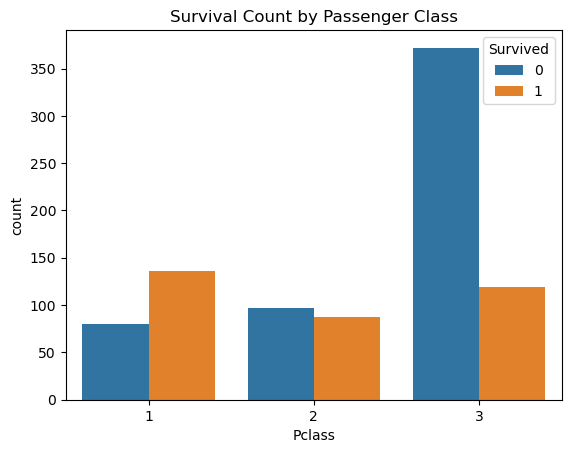

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

Observation: Passengers in 1st class had a much higher survival rate compared to those in 3rd class, where the majority of passengers did not survive.

### 4.2. Survival rate by sex

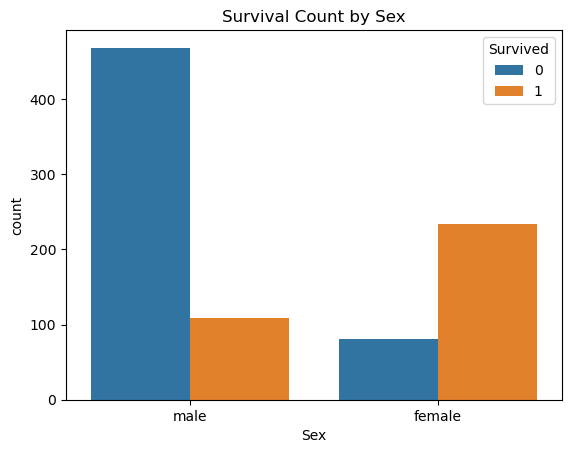

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

Observation: Female passengers had a significantly higher chance of survival than male passengers, confirming the 'women and children first' protocol.

### 4.3. Correlation Heatmap

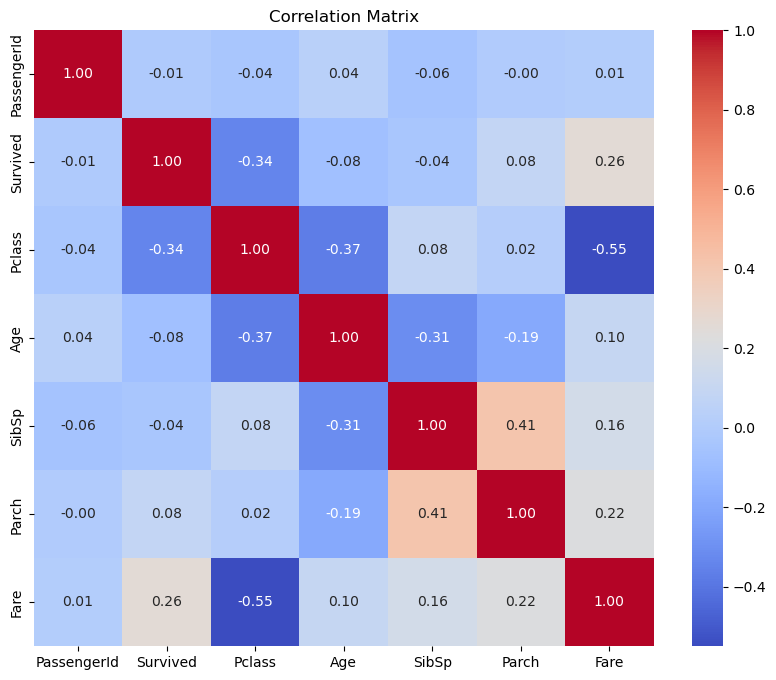

In [14]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Observation: There is a strong negative correlation between Pclass and Fare (-0.55), meaning higher fares are associated with lower class numbers (i.e., 1st class). Pclass also has a negative correlation with Survived, indicating a lower survival chance for higher class numbers.

### Pairplot of Key Features

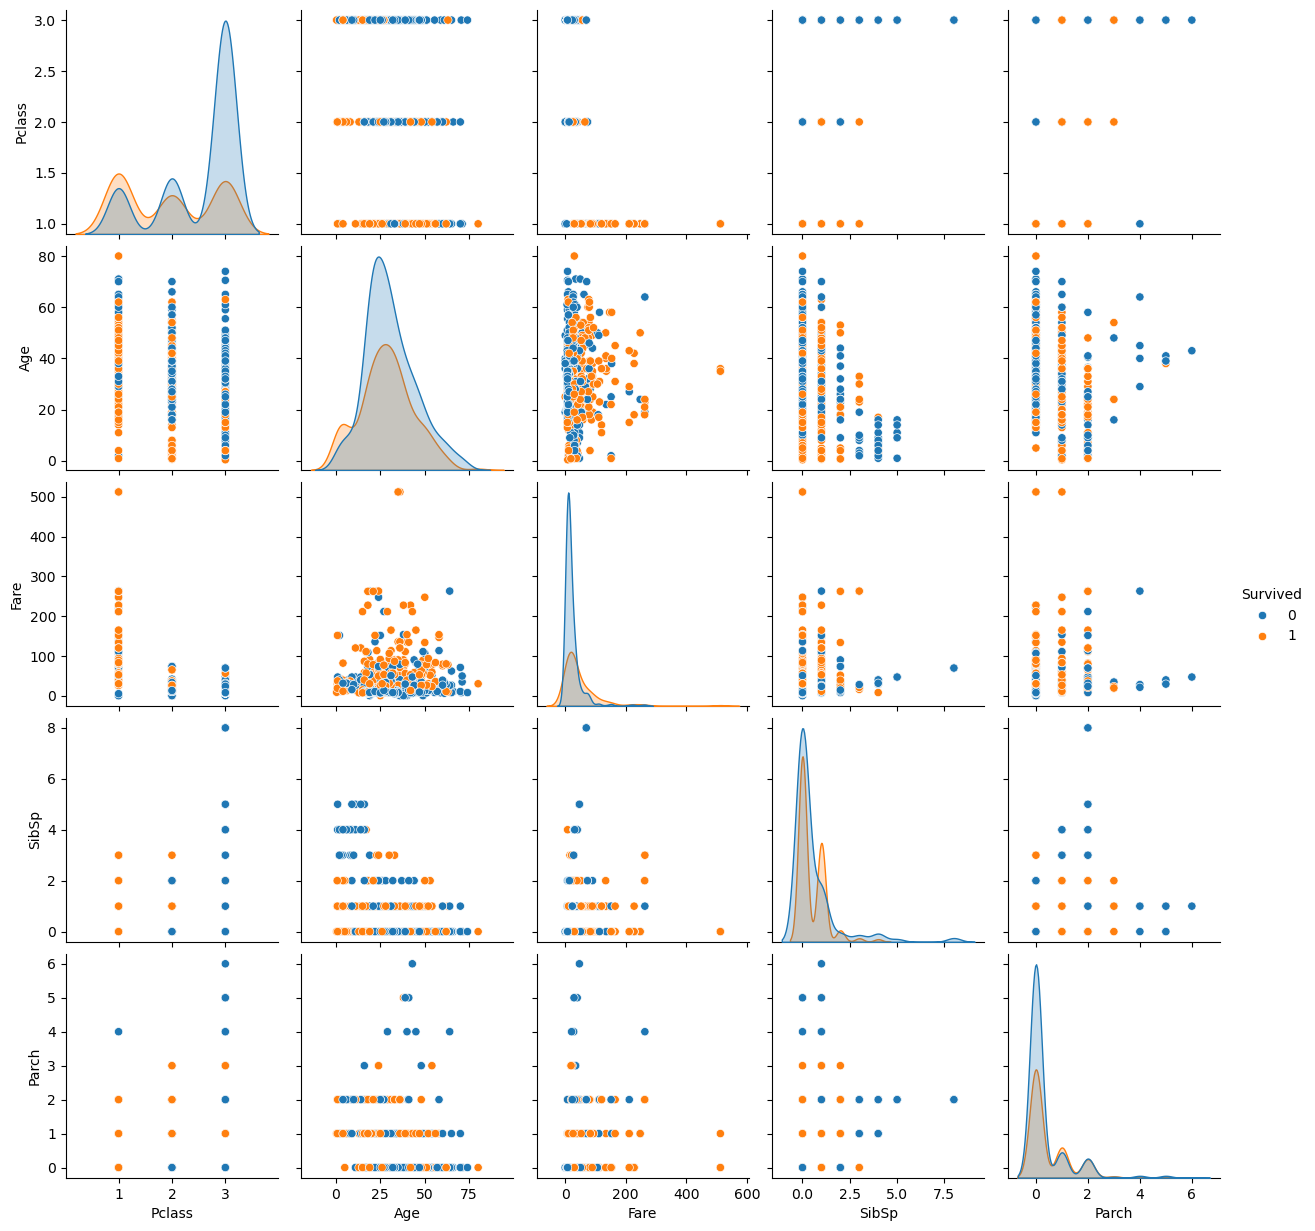

In [16]:
# We will use a subset of columns for readability
sns.pairplot(df, vars=['Pclass', 'Age', 'Fare', 'SibSp', 'Parch'], hue='Survived')
plt.show()

Observation: The pairplot confirms our findings. For instance, the scatterplots show that most of the deceased passengers are concentrated in the lower Fare and higher Pclass regions.

## 5. Summary Of Findings
This section provides a final summary of all the key insights gathered during the analysis

*Finding 1: Survival was heavily dependent on socioeconomic status. First-class passengers had a significantly higher survival rate than third-class passengers.

*Finding 2: Gender was a primary factor in survival, with female passengers having a much higher chance of survival than males.

*Finding 3: The passenger fare data was highly skewed, indicating a large wealth disparity. Higher fares were strongly correlated with a higher chance of survival.

# Conclusion
This exploratory data analysis of the Titanic dataset has successfully identified several key factors that influenced passenger survival. The patterns discovered, particularly regarding passenger class and sex, provide clear insights into the tragic event. This analysis serves as a foundational step for any future predictive modeling tasks.